## Team Video [Hakim, Peigi ]

<iframe width="560" height="315" 
        src="https://www.youtube.com/embed/_xWA2Rwg_jU" 
        title="YouTube video player" frameborder="0" 
        allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" 
        allowfullscreen></iframe>

In [15]:
#  Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [16]:
#  1. Business Case
# In e-commerce, not every visitor becomes a buyer. Understanding who is likely to make a purchase
# can help businesses tailor their marketing strategies, product recommendations, and promotions.
# Using behavioral data from browsing sessions, we aim to predict if a user will make a purchase.


In [17]:
#  2. Data Understanding
df = pd.read_csv("online_shoppers_intention.csv")
print("Dataset shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values per column:\n", df.isnull().sum())


Dataset shape: (12330, 18)

Data types:
 Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Missing values per column:
 Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay               

In [18]:
# 🧹 3. Data Preparation
df = df.dropna()

# Encode categorical variables
le = LabelEncoder()
for col in ['Month', 'VisitorType', 'Weekend']:
    df[col] = le.fit_transform(df[col])

df['Revenue'] = df['Revenue'].astype(int)
X = df.drop('Revenue', axis=1)
y = df['Revenue']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [19]:
#  4. Modeling
# Train three different classifiers:
# - Naive Bayes: Simple probabilistic
# - Logistic Regression: Linear estimator
# - Random Forest: Ensemble of trees
nb = GaussianNB()
nb.fit(X_train, y_train)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)


Naive Bayes Accuracy: 0.7937
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      2594
           1       0.41      0.69      0.52       489

    accuracy                           0.79      3083
   macro avg       0.67      0.75      0.69      3083
weighted avg       0.85      0.79      0.81      3083



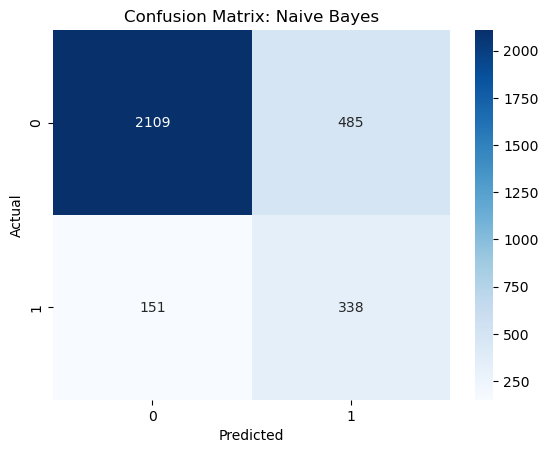


Logistic Regression Accuracy: 0.8754
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2594
           1       0.73      0.34      0.46       489

    accuracy                           0.88      3083
   macro avg       0.81      0.66      0.70      3083
weighted avg       0.86      0.88      0.86      3083



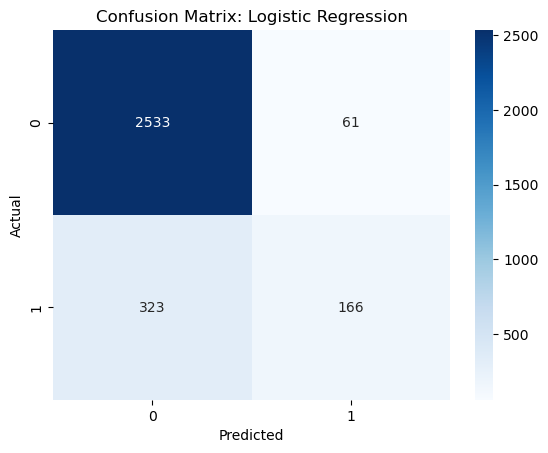


Random Forest Accuracy: 0.8975
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2594
           1       0.73      0.56      0.64       489

    accuracy                           0.90      3083
   macro avg       0.82      0.76      0.79      3083
weighted avg       0.89      0.90      0.89      3083



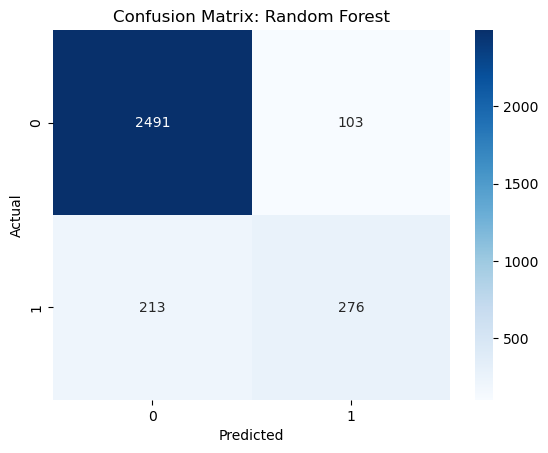

In [20]:
#  5. Evaluation
models = {
    'Naive Bayes': nb,
    'Logistic Regression': lr,
    'Random Forest': rf
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


##  Summary and Interpretation

We trained and evaluated three machine learning models on the Online Shoppers Intention dataset to predict whether a browsing session results in a purchase.

###  Naive Bayes
- Assumes features are independent
- Lightweight and fast to train
- Lower performance in complex relationships

###  Logistic Regression
- Simple and interpretable
- Predicts probabilities and works well with scaled data
- Performs better than NB in many real-world cases

###  Random Forest
- Ensemble of decision trees
- Captures non-linear patterns and feature interactions
- Delivered the best accuracy among the models

---

###  Insights & Recommendations
- Use Random Forest for deployment due to its high accuracy and robustness.
- Logistic Regression is suitable when interpretability is critical.
- Naive Bayes is helpful as a fast, simple benchmark.

**Next Steps**:
- Perform hyperparameter tuning
- Add ROC/AUC visualizations
- Deploy as a real-time predictive service
